# Write a Data Science Blog Post @Udacity - Become a Data Scientist

by Armin Sedlmeyr, a Udacity student from Munich, Germany working @BMW Group

## Software used:
pandas, 
NumPy, 
requests, 
tweepy, 
json

## General Project Requirements:
> **Code Functionality and Readability**:
- [ ] Code has easy-to-follow logical structure. The code uses comments effectively and/or Notebook Markdown cells correctly. The steps of the data science process (gather, assess, clean, analyze, model, visualize) are clearly identified with comments or Markdown cells, as well. The naming for variables and functions should be according to PEP8 style guide.
- [ ] All the project code is contained in a Jupyter notebook, which demonstrates successful execution and output of the code.
- [ ] Code is well documented and uses functions and classes as necessary. All functions include document strings. DRY principles are implemented.

> **Data**:
- [ ] Project follows the CRISP-DM process outlined for questions through communication. This can be done in the README or the notebook. If a question does not require machine learning, descriptive or inferential statistics should be used to create a compelling answer to a particular question.
- [ ] Categorical variables are handled appropriately for machine learning models (if models are created). Missing values are also handled appropriately for both descriptive and ML techniques. Document why a particular approach was used, and why it was appropriate for a particular situation.

> **Analysis, Modeling, Visualization**:
- [ ] There are between 3-5 questions asked, related to the business or real-world context of the data. Each question is answered with an appropriate visualization, table, or statistic.

> **Github Repository**:
- [ ] Student must have a Github repository of their project. The repository must have a README.md file that communicates the libraries used, the motivation for the project, the files in the repository with a small description of each, a summary of the results of the analysis, and necessary acknowledgements. Students should not use another student's code to complete the project, but they may use other references on the web including StackOverflow and Kaggle to complete the project.

> **Blog Post**:
- [ ] Student must have a blog post on a platform of their own choice (can be on their website, a Medium post or Github blog post). Student must communicate their results clearly. The post should not dive into technical details or difficulties of the analysis - this should be saved for Github. The post should be understandable for non-technical people from many fields.
- [ ] Student must have a title and image to draw readers to their post.
- [ ] There are no long, ongoing blocks of text without line breaks or images for separation anywhere in the post.
- [ ] Each question is answered with a clear visual, table, or statistic that provides how the data supports or disagrees with some hypothesis that could be formed by each question of interest.


# Introduction

#### Data Set Information

**Airbnb Open Data.** Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA/in Boston, MA.

<ins>Listings</ins>, including full descriptions and average review score

<ins>Reviews</ins>, including unique id for each reviewer and detailed comments

<ins>Calendar</ins>, including listing id and the price and availability for that day

#### Data used
- kaggle-seattle-air-bnb [link](https://www.kaggle.com/airbnb/seattle)
- kaggle-boston-air-bnb [link](https://www.kaggle.com/airbnb/boston)

#### Table of Contents
<ul>    
<li><a href="#Data Wrangling">1 Data Wrangling</a></li> 
<li><a href="#Gather">1.1 Gather</a></li>
<li><a href="#Assess">1.2 Assess</a></li>
<li><a href="#Clean">1.3 Clean</a></li>
<li><a href="#Analyse Data">2 Analyse Data</a></li>
<li><a href="#Explore">2.1 Explore - Descriptive Statistics</a></li>
<li><a href="#Draw Conclusions">2.2 Draw Conclusions - Inferential Statistics</a></li>
<li><a href="#Communicate the results">2.3 Communicate the results</a></li>  
</ul>

<a id='Data Wrangling'></a>
## 1. Data Wrangling
<a id='Gather'></a>
## 1.1 Gather


In [278]:
#import libararies needed
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import string
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
import timeit
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

#notebook config
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_columns = None

#load the csv-file into a dataframe from the jupyter workspace
boston_calendar = pd.read_csv('boston-calendar.csv')
boston_listings = pd.read_csv('boston-listings.csv')
boston_reviews = pd.read_csv('boston-reviews.csv')
seattle_calendar = pd.read_csv('seattle-calendar.csv')
seattle_listings = pd.read_csv('seattle-listings.csv')
seattle_reviews = pd.read_csv('seattle-reviews.csv')

<a id='Assess'></a>
## 1.2 Assess

> **General Notes about this step of Data Wrangling**:
- **Types of assessment**:
    - <ins>Visual assessment:</ins> scrolling through the data in your preferred software application (Google Sheets, Excel, a text editor, etc.).
        - df.head()
        - df.tail()
        - df
        - df.sample()
    - <ins>Programmatic assessment</ins>: using code to view specific portions and summaries of the data (pandas' head, tail, and info methods, for example).
        - df.duplicated()
        - .head (DataFrame and Series)
        - .tail (DataFrame and Series)
        - .sample (DataFrame and Series)
        - .info (DataFrame only)
        - .describe (DataFrame and Series)
        - .value_counts (Series only)
        - all_columns = pd.Series(list(df1)) + pd.Series(list(df2)) + pd.Series(list(df3)) #find out duplicate columns between datasets
        - all_columns[all_columns.duplicated()] #find out duplicate columns between datasets
        - Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)!
- **Quality**
    - <ins>Dirty data</ins> = low quality data = content issues
    - <ins>Quality dimensions</ins>:
        - _Completeness_: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
        - _Validity_: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
        - _Accuracy_: inaccurate data is wrong data that is valid (meaning is being technically possible, e.g. a height, that is way to low, but still is valid in the dataset, or someone named "Dsvid", that is not illegal, e.g. technically possible, but not probable). It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
        - _Consistency_: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired. (e.g. an abbreviated country, and in the same table the country being written out)!        
    - <ins>Sources of dirty data</ins>:
        - We're going to have user entry errors.
        - In some situations, we won't have any data coding standards, or where we do have standards they'll be poorly applied, causing problems in the resulting data
        - We might have to integrate data where different schemas have been used for the same type of item.
        - We'll have legacy data systems, where data wasn't coded when disc and memory constraints were much more restrictive than they are now. Over time systems evolve. Needs change, and data changes.
        - Some of our data won't have the unique identifiers it should.
        - Other data will be lost in transformation from one format to another.
        - And then, of course, there's always programmer error.
        - And finally, data might have been corrupted in transmission or storage by cosmic rays or other physical phenomenon. So hey, one that's not our fault.!
-  **[Tidiness](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)**
    - Messy data = untidy data = structural issues!
    - Tidy data requirement:
        - Each variable forms a column.
        - Each observation forms a row.
        - Each type of observational unit forms a table.
    - This section describes <ins>the five most common problems with messy datasets</ins>, along with their remedies:
        - Column headers are values, not variable names.
        - Multiple variables are stored in one column.
        - Variables are stored in both rows and columns.
        - Multiple types of observational units are stored in the same table.
        - A single observational unit is stored in multiple tables.

In [279]:
#visual assessement
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [280]:
boston_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [281]:
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation.","The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.","Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard. Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pric",none,"Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pricier. If you are cooking the Fish Market has fresh fish daily; Tony's makes his own sausages and has Italian foods; for a wide variety of delicious cheeses and chocolates go to the Cheese Cellar on Birch St.",NaN,"The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home. Walking is pleasant and restaurants, shops and grocery store are all a 6 minute walk away.","You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.",NaN,Cle

In [282]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - great amenities in the house: Plus Islam was always very helpful even though he was away
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. From the outside the house didn't look so inviting but the inside was very nice! Even though Islam himself was not there everything was prepared for our arrival. The airport T Station is only a 5-10 min walk away. The only little issue was that all the people in the house had to share one bathroom. But it was not really a problem and it worked out fine. We would recommend Islams place for a stay in Boston.
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the commodities. Very close to the airport metro station and located in quite safe area. Islam responds very quickly and is very helpful. I would recommend it.
4,1178162,5171140,2013-06-16,6848427,Andrew,"Great location. Just 5 mins walk from the Airport Station. Good food nearby.\r\nRoom was simple, clean, just what I was after."


In [283]:
#programmatic assessement
boston_calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [284]:
boston_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


review_scores_rating can be used for evaluating the listing (it is aggregated by the category ratings)

In [285]:
boston_reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


<a id='Clean'></a>
## 1.3 Clean

In [286]:
df_sc=seattle_calendar
df_sc.dropna(inplace=True)
#change price data type
df_sc.loc[:,'price']=df_sc.price.str.replace('$', '').str.replace(',', '').astype('double')
df_sc

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [287]:
df_sc.date.astype('datetime64')

0         2016-01-04
1         2016-01-05
9         2016-01-13
10        2016-01-14
14        2016-01-18
             ...    
1393207   2016-01-06
1393208   2016-01-07
1393211   2016-01-10
1393212   2016-01-11
1393213   2016-01-12
Name: date, Length: 934542, dtype: datetime64[ns]

In [288]:
df_sc['month']=pd.DatetimeIndex(df_sc['date']).month

In [289]:
df_sc_agg=df_bc.groupby(by='month').mean().reset_index()

In [290]:
df_bc=boston_calendar
df_bc.dropna(inplace=True)
#change price data type
df_bc.loc[:,'price']=df_bc.price.str.replace('$', '').str.replace(',', '').astype('double')
df_bc

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0
...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0
1308876,14504422,2016-09-19,t,62.0
1308877,14504422,2016-09-18,t,62.0
1308878,14504422,2016-09-17,t,62.0


In [291]:
df_br=boston_reviews

In [292]:
df_bc.date.astype('datetime64')

365       2017-08-22
366       2017-08-21
367       2017-08-20
368       2017-08-19
369       2017-08-18
             ...    
1308875   2016-09-20
1308876   2016-09-19
1308877   2016-09-18
1308878   2016-09-17
1308879   2016-09-16
Name: date, Length: 643037, dtype: datetime64[ns]

In [293]:
df_bc['month']=pd.DatetimeIndex(df_bc['date']).month

In [294]:
df_bc_agg=df_bc.groupby(by='month').mean().reset_index()

In [295]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [296]:
#check columns
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [297]:
#only take some columns of interest
df_bl = boston_listings[['id', 'price', 'beds', 'bedrooms', 'bathrooms', 'accommodates', 'property_type', 'room_type', 'host_is_superhost']]

In [298]:
df_bl_neighbourhood = boston_listings[['id', 'neighborhood_overview', 'host_neighbourhood']]

In [299]:
#check non-numeric columns
df_bl.select_dtypes(['object'])

,price,property_type,room_type,host_is_superhost
0,$250.00,House,Entire home/apt,f
1,$65.00,Apartment,Private room,f
2,$65.00,Apartment,Private room,t
3,$75.00,House,Private room,f
4,$79.00,House,Private room,t
...,...,...,...,...
3580,$69.00,Apartment,Private room,f
3581,$150.00,Apartment,Private room,f
3582,$198.00,Apartment,Entire home/apt,f
3583,$65.00,Apartment,Private room,f


In [300]:
#credits/source/inspiration: https://www.kaggle.com/chaitanyakck/part-3-relationship-b-w-reviews-and-price
#create new column with the corresponding language to a reviewer comment

df_bl_neighbourhood.dropna(subset=['neighborhood_overview'], inplace=True)
df_bl_neighbourhood.dropna(subset=['host_neighbourhood'], inplace=True)
df_bl_neighbourhood['host_neighbourhood']=df_bl_neighbourhood['host_neighbourhood'].astype('str')
def detect_language(host_neighbourhood):
    '''
    INPUT:
    comment - string
    
    OUTPUT:
    language - string
    '''        
    try:
        language=detect(host_neighbourhood)
    except:
        language='None'
    return language

#apply function on comment column to create a new column language
df_bl_neighbourhood['lingu']=df_bl_neighbourhood['host_neighbourhood'].map(lambda host_neighbourhood : detect_language(host_neighbourhood)) #lambda better performance than looping

df_bl_neighbourhood['lingu'].value_counts()

C:\Users\Q492916\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Q492916\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Q492916\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

en    1190
tl    224 
id    204 
de    169 
fi    52  
et    41  
ca    23  
pt    22  
af    17  
cy    15  
pl    9   
da    5   
no    3   
es    2   
sv    2   
hu    2   
it    1   
nl    1   
Name: lingu, dtype: int64

In [301]:
#taking rows whose language is eng
df_bl_neighbourhood=df_bl_neighbourhood[df_bl_neighbourhood.lingu=='en']

In [302]:
df_bl.room_type.value_counts()

Entire home/apt    2127
Private room       1378
Shared room        80  
Name: room_type, dtype: int64

In [303]:
#convert to numeric where possible
df_bl.loc[:,'host_is_superhost']=df_bl.host_is_superhost.str.replace('f', '0').str.replace('t', '1').astype('int')

In [304]:
df_bl.property_type.value_counts()

Apartment          2612
House              562 
Condominium        231 
Townhouse          54  
Bed & Breakfast    41  
Loft               39  
Other              17  
Boat               12  
Villa              6   
Entire Floor       4   
Dorm               2   
Guesthouse         1   
Camper/RV          1   
Name: property_type, dtype: int64

In [305]:
df_bl.room_type.value_counts()

Entire home/apt    2127
Private room       1378
Shared room        80  
Name: room_type, dtype: int64

In [306]:
#create function for converting categorial variables
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [307]:
#change price data type
df_bl.loc[:,'price']=df_bl.price.str.replace('$', '').str.replace(',', '').astype('double')

In [308]:
#check nan values
df_bl.describe()

,id,price,beds,bedrooms,bathrooms,accommodates,host_is_superhost
count,3.585000e+03,3585.000000,3576.000000,3575.000000,3571.000000,3585.000000,3585.000000
mean,8.440875e+06,173.925802,1.609060,1.255944,1.221647,3.041283,0.113529
std,4.500787e+06,148.331321,1.011745,0.753060,0.501487,1.778929,0.317282
min,3.353000e+03,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.679319e+06,85.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,8.577620e+06,150.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,1.278953e+07,220.000000,2.000000,2.000000,1.000000,4.000000,0.000000
max,1.493346e+07,4000.000000,16.000000,5.000000,6.000000,16.000000,1.000000


In [309]:
#double check if nan exist for target-variable
df_bl.price.notna().mean()

1.0

In [310]:
#drop any nan-values from the predictor-variables
df_bl=df_bl.dropna()

In [311]:
#check if successful
df_bl.describe()

,id,price,beds,bedrooms,bathrooms,accommodates,host_is_superhost
count,3.554000e+03,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000
mean,8.477490e+06,174.141531,1.612549,1.257456,1.222707,3.050366,0.114519
std,4.473766e+06,148.769218,1.013764,0.754651,0.502450,1.782422,0.318485
min,3.353000e+03,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.760998e+06,85.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,8.610863e+06,150.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,1.279713e+07,220.000000,2.000000,2.000000,1.000000,4.000000,0.000000
max,1.493346e+07,4000.000000,16.000000,5.000000,6.000000,16.000000,1.000000


In [312]:
df_bl.room_type.value_counts()

Entire home/apt    2111
Private room       1364
Shared room        79  
Name: room_type, dtype: int64

In [313]:
df_bl.property_type.value_counts()

Apartment          2592
House              556 
Condominium        231 
Townhouse          54  
Bed & Breakfast    39  
Loft               39  
Other              17  
Boat               12  
Villa              6   
Entire Floor       4   
Dorm               2   
Guesthouse         1   
Camper/RV          1   
Name: property_type, dtype: int64

In [314]:
#Use your newly created function
df_bl_cat = df_bl.select_dtypes(include=['object'])
cat_cols_lst = df_bl_cat.columns
df_bl = create_dummy_df(df_bl, cat_cols_lst, dummy_na=False)

#check results
df_bl.sample(5)

,id,price,beds,bedrooms,bathrooms,accommodates,host_is_superhost,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room
2866,4484747,49.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
772,8014642,79.0,1.0,1.0,1.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1767,12372052,150.0,2.0,2.0,1.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2721,14593751,55.0,1.0,1.0,1.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2546,716245,125.0,2.0,2.0,1.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id='Clean'></a>
## 2 Analyse Data

#### Inspiration by https://www.kaggle.com/airbnb/seattle/ & https://www.kaggle.com/arjunpmm/airbnb-seattle-analysis-and-prediction
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?


#### Own ideas:
- What influences the price?
- What influences the review score?
- Does the weekday influence the price of a listing?
- Does the season/month influence the price of a listing?

#### final questions (chosen from above):
- a) What influences the price? Is a linear regressin model sufficient to predict the price?
- b) Does the month/season influence the price of a listing?
- c) Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- d) Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?

<a id='Explore'></a>
### 2.1 Explore - Descriptive Statistics

**b) Does the month/season influence the price of a listing?**

In [315]:
df_bc.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 5 columns):
listing_id    643037 non-null int64
date          643037 non-null object
available     643037 non-null object
price         643037 non-null float64
month         643037 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 29.4+ MB


In [316]:
df_bc_agg_month

,month,listing_id,price,season
0,1,7.780883e+06,182.799671,1.0
1,2,7.742313e+06,180.961028,2.0
2,3,7.447318e+06,181.818742,3.0
3,4,7.419609e+06,197.252890,4.0
4,5,7.393200e+06,193.712295,5.0
5,6,7.404531e+06,196.535302,6.0
6,7,7.408728e+06,202.486309,7.0
7,8,7.403228e+06,203.330142,8.0
8,9,7.943009e+06,237.047727,9.0
9,10,8.327808e+06,233.416248,10.0


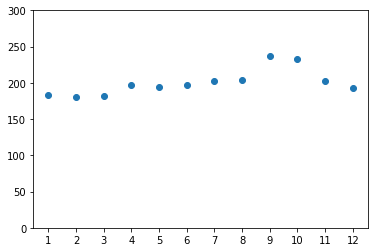

In [317]:
plt.scatter(df_bc_agg_month.month, df_bc_agg_month.price);
plt.ylim([0, 300]);
plt.xticks(np.arange(1, 13, step=1));

**d) Is Boston in general more expensive than Seattle?**

In [322]:
def calc_statistical_relevance(df, var_group_by, var_test):#    
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    var_group_by - a string holding the variable name to group the results by
    var_test - a string holding the variable name to calculate a confidential interval for
    
    OUTPUT:
    confidential interval
    diagramm including a visualization of the confidential interval
    '''
    ############## bootstrap approach
    #build confident intervalls to double check, since hypothesis testing isn't very intuitive:
    #pro tip by udacity: The bootstrap approach with confidence intervals can be used in place of any other hypoethis test
    price_means_per_month = {}
    for level in df[var_group_by].unique():
        price_means = []
        for _ in range(100):
            #bootstrap
            bootstrap=df.loc[df[var_group_by]==level, var_test].sample(int(df.shape[0]/10), replace=True)
            #calculate sample medians
            price_mean=bootstrap.mean()
            #append to list
            price_means.append(price_mean)                
        #make np.arrays
        price_means=np.array(price_means)
        price_means_per_month[level]=price_means

    alpha=0.05
    xerrs=[]
    xwidths=[]
    for level in df[var_group_by].unique():
        print('{}: {} {}'.format(level, (round((np.percentile(price_means_per_month[level], alpha)), 2)), round((np.percentile(price_means_per_month[level], 100-alpha)), 2)))
        err=((np.percentile(price_means_per_month[level], alpha))-(np.percentile(price_means_per_month[level], 100-alpha)))/2
        xerrs.append(err)
        width=((np.percentile(price_means_per_month[level], alpha))+(np.percentile(price_means_per_month[level], 100-alpha)))/2
        xwidths.append(width)        
    plt.figure(figsize=[10,5])
    plt.barh(width=xwidths, y=df[var_group_by].unique(), xerr=xerrs);
    plt.xlabel('mean price')

1: 122.27 123.67
2: 123.63 124.95
3: 128.0 129.37
4: 134.38 135.85
5: 138.82 140.66
6: 146.47 148.39
7: 151.01 153.24
8: 149.48 151.96
9: 142.36 144.2
10: 136.16 137.9
11: 135.05 136.53
12: 136.34 137.93


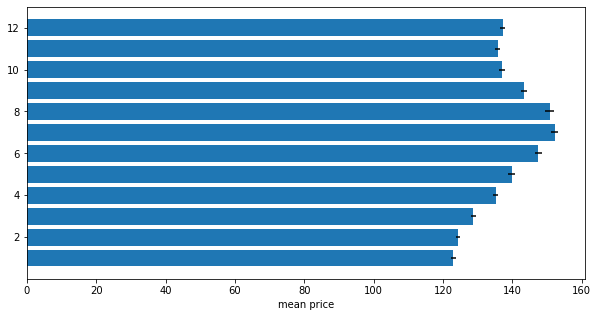

In [323]:
calc_statistical_relevance(df_sc, 'month', 'price')

8: 201.47 205.31
7: 200.48 204.58
6: 194.35 197.87
5: 191.57 194.89
4: 195.62 199.46
3: 179.77 183.64
2: 179.75 182.54
9: 235.02 238.86
1: 181.49 184.49
12: 190.97 193.69
11: 201.55 204.67
10: 231.25 235.63


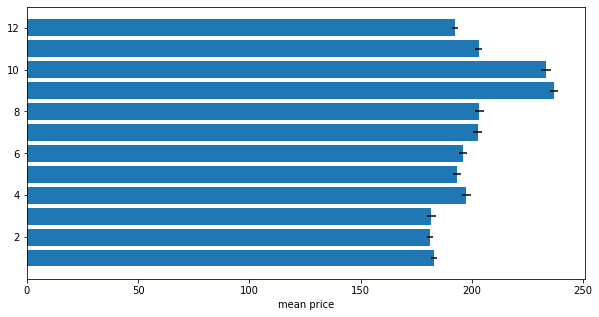

In [324]:
calc_statistical_relevance(df_bc, 'month', 'price')

**c) Can you describe the vibe of each Seattle neighborhood using listing descriptions?**

In [ ]:
#choose relevant sample by taking top_10_neighbourhoods by listing count
top_5_neighbourhoods = df_bl_neighbourhood.host_neighbourhood.value_counts().head(5).index.values

In [ ]:
#iterate through top_10_neighbourhoods and get most common words + a visualisation as a word-cloud
for hood in top_5_neighbourhoods:
    #credits/source/inspiration: https://www.kaggle.com/chaitanyakck/part-3-relationship-b-w-reviews-and-price
    #credits/source/inspiration: https://medium.com/illumination/scraping-news-and-creating-a-word-cloud-in-python-10ea312c49ba
    words=''
    for row in df_bl_neighbourhood.loc[df_bl_neighbourhood['host_neighbourhood'] == hood].iterrows():
        words += df_bl_neighbourhood.loc[df_bl_neighbourhood['host_neighbourhood'] == hood, 'neighborhood_overview'][row[0]]
    reviews_data=nltk.word_tokenize(words)
    string_punctuation = string.punctuation
    ignoreChar=['\r','\n','',' ',"'s",'!',',',]
    nums=['0','1','2','3','4','5','6','7','8','9']

    cachedStopWords = stopwords.words("english")
    cachedStopWords.append('the')
    
    words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
    words_only = [s for s in words_only if s]
    comments_filtered_data=' '.join(words_only)
    comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])
    
    #only adjectives
    tokens = nltk.word_tokenize(comments_filtered_data)
    tags = nltk.pos_tag(tokens)
    comments_filtered_data_adj = [word for word, pos in tags if (pos in ['JJR', 'JJ', 'JJS', 'RB', 'RBR', 'RBS'])]
    comments_filtered_data_adj=' '.join(comments_filtered_data_adj)
    
    #visualize
    print(hood)
    wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data_adj)
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    pd.Series(WordCloud().process_text(comments_filtered_data_adj)).sort_values(ascending=False).head(10).plot.bar()

In [ ]:
if 0:
    #credits/source/inspiration: https://www.kaggle.com/chaitanyakck/part-3-relationship-b-w-reviews-and-price
    words=''
    for index, row in df_br.iterrows():    
        words += row['comments']

    reviews_data=nltk.word_tokenize(words)
    string_punctuation = string.punctuation
    ignoreChar=['\r','\n','',' ',"'s",'!',',',]
    nums=['0','1','2','3','4','5','6','7','8','9']

    cachedStopWords = stopwords.words("english")
    cachedStopWords.append('the')

    words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
    words_only = [s for s in words_only if s]
    comments_filtered_data=' '.join(words_only)
    comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

    wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

**a) What influences the price? Is a linear regressin model sufficient to predict the price?**

In [ ]:
plt.scatter(df_bl.price, df_bl.price, s=5);

In [ ]:
#looking
df_bl.price.hist(bins=25);

In [ ]:
df_bl

In [ ]:
#sns.heatmap(df_bl.corr());
df_bl.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
#check feature importance by listing the correlation
df_bl.corr()['price'].abs().sort_values().plot.bar();

In [ ]:
df_bl.shape

In [ ]:
#check feature importance by recursive feature elimination
X = df_bl.drop('price', axis=1)
y = df_bl['price']
#estimator = SVR(kernel="linear")
#estimator = LinearRegression()
#estimator = Ridge()
estimator = ElasticNet() #according to this cheat-sheet the ElasticNet-Estimator is fine: https://scikit-learn.org/stable/_static/ml_map.png
#estimator = Lasso()
selector = RFE(estimator, n_features_to_select=10, step=5)
selector = selector.fit(X, y)
selector.support_
i=0
chosen_features=[]
for bool in selector.support_:
    if bool:
        chosen_features.append(X.columns[i])
    i+=1
chosen_features.append('price')
chosen_features



<a id='Draw Conclusions'></a>
### 2.2 Draw Conclusions - Inferential Statistics


**a) What influences the price? Is a linear regressin model sufficient to predict the price?**

In [ ]:
#prepare dataframe
df_bl=df_bl[chosen_features]

In [ ]:
#only take rows, where price is less than 600. Why? a Linear regression model is not appropiate for nonlinear-data
df_bl=df_bl[df_bl.price<=600]

In [ ]:
df_bl

In [ ]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)
    

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = clean_fit_linear_mod(df_bl, 'price', cat_cols_lst, dummy_na=False)

In [ ]:
#r-squared for predicting the price
test_score

In [ ]:
#predicted vs. actual price
sns.regplot(y_test, y_test_preds);
plt.xlabel('Actual-Price')
plt.ylabel('Predicted-Price');



<a id='Communicate the results'></a>
### 2.3 Communicate the results

